In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

matplotlib.rc("axes", unicode_minus = False)

In [3]:
df1 = pd.read_csv("01 Oxidation.csv")
df2 = pd.read_csv("02 Photo_softbake.csv")
df3 = pd.read_csv("03 Photo_lithograpy.csv")
df4 = pd.read_csv("04 Etching.csv")
df5 = pd.read_csv("05 Ion_Implantation.csv")
df6 = pd.read_csv("06 Inspect.csv")

In [4]:
df = pd.merge(df1, df2, on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df3, on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df4, on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df5, on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df6, on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])

In [5]:
df.dropna(subset="Thin F2", inplace=True) # 다른 변수들과의 연관성을 찾지못함, 한 행에 여러 열들 결측값 가짐
# pd.set_option('display.max_row', 200)
# pd.set_option('display.max_columns', 200)

In [6]:
df['Ox_Chamber'] = df['Ox_Chamber'].astype('str')
df['photo_soft_Chamber'] = df['photo_soft_Chamber'].astype('str')
df['lithography_Chamber'] = df['lithography_Chamber'].astype('str')
df['Etching_Chamber'] = df['Etching_Chamber'].astype('str')
df['Chamber_Num'] = df['Chamber_Num'].astype('str')
df['path'] = df['Ox_Chamber']+df['photo_soft_Chamber']+df['lithography_Chamber']+df['Etching_Chamber']+df['Chamber_Num']

In [7]:
df.drop(df[df['Oxid_time']<0].index, inplace=True) # 산화시간이 음수
df.drop(df[df['Target']==0].index, inplace=True) # target 값이 0
df.drop(columns = ["Wafer_map","Error_message"],inplace=True) # 웨이퍼맵, 에러메시지

In [8]:
# 시간 데이터 datetime 유형으로 변환
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y')

# 195이상 = 불량(1), 195미만 = 양품(0)
df.loc[df['Target'] >= 195, '불량_195이상'] =1
df.loc[df['Target'] < 195, '불량_195이상'] =0

In [9]:
df.loc[df['Thin F4']<0, 'Thin F4']=df['Thin F4'].median()
df.loc[df['Flux90s']<0, 'Flux90s']=df['Flux90s'].median()
df.loc[df['Flux160s']<0, 'Flux160s']=df['Flux160s'].median()
df.loc[df['Flux160s']<5, 'Flux160s']=df['Flux160s'].median()

In [10]:
df['Thin F1'].fillna(df['Thin F1'].median(), inplace=True)
df['Thin F3'].fillna(df['Thin F3'].median(), inplace=True)
df['Flux60s'].fillna(df['Flux90s'].median(), inplace=True)
df['Flux90s'].fillna(df['Flux90s'].median(), inplace=True)
df['Flux480s'].fillna(df['Flux90s'].median(), inplace=True)
df['Flux840s'].fillna(df['Flux90s'].median(), inplace=True)

### 불필요한 열 제거

In [11]:
# 불필요한 열 제거 
# df.drop(columns=["No_Die", "Lot_Num", "Wafer_Num"], inplace=True)
df.drop(columns=['Vapor','process','Wavelength'])
df.loc[df['Flux840s'] == 8.137500e+16, 'Flux840s'] = df['Flux840s'].mode()[0]
df.loc[df['Flux480s'] == 8.137500e+16, 'Flux480s'] = df['Flux480s'].mode()[0]
# df = df[['Temp_Oxid','ppm','Pressure','type','Oxid_time',
#         'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake',
#        'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake',
#        'temp_softbake', 'time_softbake', 'UV_type', 'Energy_Exposure',
       
#         'Temp_Etching', 'Source_Power',
#        'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp',
#        'Target', 'path', '불량_195이상']]

In [12]:
df.columns

Index(['No_Die', 'Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor', 'ppm',
       'Pressure', 'Oxid_time', 'thickness', 'Lot_Num', 'Wafer_Num',
       'Datetime', 'photo_soft_Chamber', 'process 2', 'resist_target',
       'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake',
       'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake',
       'temp_softbake', 'time_softbake', 'lithography_Chamber', 'Process 2-1',
       'Line_CD', 'UV_type', 'Wavelength', 'Resolution', 'Energy_Exposure',
       'Etching_Chamber', 'Process 3', 'Thin F4', 'Thin F3', 'Thin F2',
       'Thin F1', 'Temp_Etching', 'Source_Power', 'Selectivity', 'Chamber_Num',
       'process4', 'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s',
       'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp',
       'Target', 'path', '불량_195이상'],
      dtype='object')

In [13]:
negative_values = df.select_dtypes(include=['number']).lt(0)

# 음수 값을 가진 열 목록 출력
columns_with_negative_values = negative_values.any()
print("Columns with negative values:")
print(columns_with_negative_values[columns_with_negative_values].index.tolist())

# 각 열에서 음수 값을 포함한 행 수 출력
print("\nNumber of rows with negative values in each column:")
print(negative_values.sum())

Columns with negative values:
[]

Number of rows with negative values in each column:
Temp_OXid            0
ppm                  0
Pressure             0
Oxid_time            0
thickness            0
Lot_Num              0
Wafer_Num            0
resist_target        0
N2_HMDS              0
pressure_HMDS        0
temp_HMDS            0
temp_HMDS_bake       0
time_HMDS_bake       0
spin1                0
spin2                0
spin3                0
photoresist_bake     0
temp_softbake        0
time_softbake        0
Line_CD              0
Wavelength           0
Resolution           0
Energy_Exposure      0
Thin F4              0
Thin F3              0
Thin F2              0
Thin F1              0
Temp_Etching         0
Source_Power         0
Selectivity          0
Flux60s              0
Flux90s              0
Flux160s             0
Flux480s             0
Flux840s             0
input_Energy         0
Temp_implantation    0
Furance_Temp         0
RTA_Temp             0
Target           

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1693 entries, 0 to 1703
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No_Die               1693 non-null   object        
 1   Ox_Chamber           1693 non-null   object        
 2   process              1693 non-null   object        
 3   type                 1693 non-null   object        
 4   Temp_OXid            1693 non-null   float64       
 5   Vapor                1693 non-null   object        
 6   ppm                  1693 non-null   float64       
 7   Pressure             1693 non-null   float64       
 8   Oxid_time            1693 non-null   int64         
 9   thickness            1693 non-null   float64       
 10  Lot_Num              1693 non-null   int64         
 11  Wafer_Num            1693 non-null   int64         
 12  Datetime             1693 non-null   datetime64[ns]
 13  photo_soft_Chamber   1693 non-null   o

In [15]:
# pd.set_option('display.max_row', 200)
# pd.set_option('display.max_columns', 200)
df['path'].value_counts()

path
22222    44
13222    43
21222    42
32222    42
23222    42
         ..
32322     9
32233     9
32211     9
32122     9
31211     9
Name: count, Length: 81, dtype: int64

In [16]:
# paths = []

# # df['path']의 유일한 값들을 paths 리스트에 추가
# for path in df['path'].unique():
#     paths.append(str(path))

# def calculate_control_limits(data):
#     CL = data.mean()
#     UCL = CL + 3 * np.sqrt(CL)
#     LCL = CL - 3 * np.sqrt(CL)
#     return CL, UCL, LCL

# # 각 path에 대해 그래프 그리기
# for path in paths:
#     # 해당 path에 대한 데이터 추출
#     filtered_df = df[df['path'] == path]
    
#     # CL, UCL, LCL 계산
#     CL, UCL, LCL = calculate_control_limits(filtered_df['Target'])
    
#     # 경계선 안에 있는 값의 비율 계산
#     inside_limit = filtered_df[(filtered_df['Target'] >= LCL) & (filtered_df['Target'] <= UCL)]
#     inside_ratio = len(inside_limit) / len(filtered_df) * 100
    
#     # 경계선 밖에 있는 값의 비율 계산
#     outside_limit = filtered_df[(filtered_df['Target'] < LCL) | (filtered_df['Target'] > UCL)]
#     outside_ratio = len(outside_limit) / len(filtered_df) * 100
    
#     # C 관리도 그리기
#     plt.figure(figsize=(10, 6))
#     plt.plot(filtered_df['No_Die'], filtered_df['Target'], marker='o', linestyle='-')
#     plt.axhline(y=CL, color='b', linestyle='--', label='CL')
#     plt.axhline(y=UCL, color='r', linestyle='--', label='UCL')
#     plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')
    
#     # 경계선 안에 있는 값과 밖에 있는 값의 비율 출력
#     plt.text(0.05, 0.9, f'Inside Limit: {inside_ratio:.2f}%', transform=plt.gca().transAxes)
#     plt.text(0.05, 0.85, f'Outside Limit: {outside_ratio:.2f}%', transform=plt.gca().transAxes)
    
#     # 그래프 타이틀과 축 라벨 설정
#     plt.title(f'C 관리도 (path: {path})')
#     plt.xlabel('Target')
#     plt.ylabel('No_Die')
    
#     # 범례 표시
#     plt.legend()
    
#     # 그래프 출력
#     plt.show()

In [17]:
# inside_ratios = {}
# outside_ratios = {}

# # 각 path에 대해 경계선 내부 및 외부 비율 계산
# for path in paths:
#     filtered_df = df[df['path'] == path]
#     CL, UCL, LCL = calculate_control_limits(filtered_df['Target'])
    
#     inside_limit = filtered_df[(filtered_df['Target'] >= LCL) & (filtered_df['Target'] <= UCL)]
#     inside_ratio = len(inside_limit) / len(filtered_df) * 100
    
#     outside_limit = filtered_df[(filtered_df['Target'] < LCL) | (filtered_df['Target'] > UCL)]
#     outside_ratio = len(outside_limit) / len(filtered_df) * 100
    
#     inside_ratios[path] = inside_ratio
#     outside_ratios[path] = outside_ratio

# # 경계선 내부 비율 상위 5개
# top_inside = dict(sorted(inside_ratios.items(), key=lambda item: item[1], reverse=True)[:5])

# # 경계선 외부 비율 상위 5개
# top_outside = dict(sorted(outside_ratios.items(), key=lambda item: item[1], reverse=True)[:5])

# plt.figure(figsize=(5, 4))
# sns.barplot(x=list(top_inside.keys()), y=list(top_inside.values()), palette='Blues_d')
# plt.title('Top 5 Paths by Inside Limit Ratio')
# plt.xlabel('Path')
# plt.ylabel('Inside Limit Ratio (%)')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# # 경계선 외부 비율 상위 5개를 막대 그래프로 표시
# plt.figure(figsize=(5, 4))
# sns.barplot(x=list(top_outside.keys()), y=list(top_outside.values()), palette='Reds_d')
# plt.title('Top 5 Paths by Outside Limit Ratio')
# plt.xlabel('Path')
# plt.ylabel('Outside Limit Ratio (%)')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [18]:
pd.set_option('display.max_row', 200)
df['path'].value_counts()

path
22222    44
13222    43
21222    42
32222    42
23222    42
11222    41
31222    35
33222    34
12222    32
12111    30
11311    30
11133    30
13111    29
12333    29
22111    29
21111    29
12311    29
21311    29
11333    29
11111    29
21133    29
13311    28
13333    28
12133    28
21333    28
32111    26
31311    26
31133    26
23333    26
23111    26
33133    26
32311    26
33311    26
23311    26
31111    26
31333    26
32133    26
22333    26
33111    25
33333    25
22311    25
22133    24
13133    22
23133    20
32333    18
12211    12
12122    12
12233    12
12322    12
13122    12
13211    12
13233    12
11322    12
11233    12
11211    12
11122    12
13322    12
22122    12
21322    12
21122    12
21233    12
22211    11
22233    11
21211    11
31233     9
23233     9
22322     9
23122     9
23211     9
23322     9
31322     9
33322     9
33233     9
33211     9
33122     9
31122     9
32322     9
32233     9
32211     9
32122     9
31211     9
Name: count, dtype: int

In [19]:
# high_err_chips = df[(df['path']=='22222')|(df['path']=='13222')|(df['path']=='21222')|(df['path']=='32222')|(df['path']=='23222')]['Target'].sum()
# low_err_chips = df[(df['path']=='32333')|(df['path']=='12211')|(df['path']=='12122')|(df['path']=='12233')|(df['path']=='12322')]['Target'].sum()

In [20]:
high_err_chips = df[(df['path']=='22222')|(df['path']=='21222')|(df['path']=='32222')|(df['path']=='23222')]['Target'].sum()
low_err_chips = df[(df['path']=='11122')|(df['path']=='21211')|(df['path']=='22233')|(df['path']=='22211')]['Target'].sum()

In [21]:
print(high_err_chips)
print(low_err_chips)

18538.0
3765.0


In [22]:
top5_counts = df['path'].value_counts().head(5)
bottom5_counts = df['path'].value_counts().tail(5)

A = pd.DataFrame({'과부하' : [high_err_chips, 2000 * top5_counts.sum() - high_err_chips],
                 '저부하' : [low_err_chips, 2000 * bottom5_counts.sum() - low_err_chips]})
A.index = ['불량칩수', '양품칩수']

In [23]:
from scipy.stats import chi2_contingency

# A 데이터프레임 생성
A = pd.DataFrame({'과부하' : [high_err_chips, 2000 * top5_counts.sum() - high_err_chips],
                  '저부하' : [low_err_chips, 2000 * bottom5_counts.sum() - low_err_chips]})
A.index = ['불량칩수', '양품칩수']

# 카이제곱 검정 수행
chi2_stat, p_val, dof, ex = chi2_contingency(A)

print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)
print("자유도:", dof)
print("기대값:")
print(pd.DataFrame(ex, index=A.index, columns=A.columns))

카이제곱 통계량: 5.049140424607866
p-value: 0.02463815820127554
자유도: 1
기대값:
               과부하          저부하
불량칩수   18412.94186   3890.05814
양품칩수  407587.05814  86109.94186


In [24]:
A

,과부하,저부하
불량칩수,18538.0,3765.0
양품칩수,407462.0,86235.0


In [25]:
print("기대값:")
pd.DataFrame(ex, index=A.index, columns=A.columns)

기대값:


,과부하,저부하
불량칩수,18412.94186,3890.05814
양품칩수,407587.05814,86109.94186


In [26]:
overload_defective_chips = 18538.0
overload_total_chips = 18538.0 + 407462.0

underload_defective_chips =3765.0
underload_total_chips = 3765.0 + 86235.0

# 과부하의 불량칩수 비율 계산
overload_defective_ratio = overload_defective_chips / overload_total_chips

# 저부하의 불량칩수 비율 계산
underload_defective_ratio = underload_defective_chips / underload_total_chips

print("과부하의 불량칩수 비율:", overload_defective_ratio)
print("저부하의 불량칩수 비율:", underload_defective_ratio)

과부하의 불량칩수 비율: 0.04351643192488263
저부하의 불량칩수 비율: 0.041833333333333333


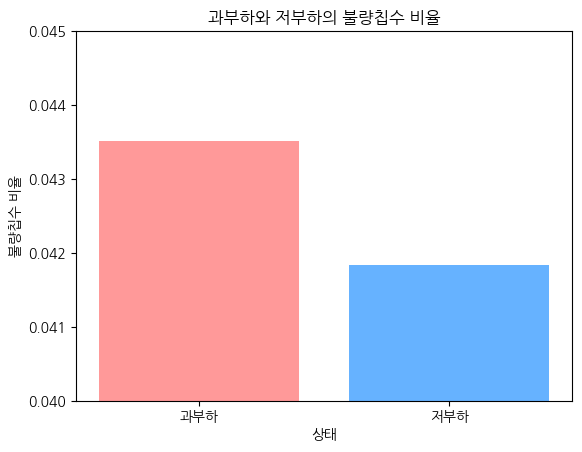

In [27]:
categories = ['과부하', '저부하']
ratios = [overload_defective_ratio, underload_defective_ratio]

colors = ['#FF9999', '#66B2FF']
plt.bar(categories, ratios, color=colors)
plt.title('과부하와 저부하의 불량칩수 비율')
plt.xlabel('상태')
plt.ylabel('불량칩수 비율')
plt.ylim(0.04, 0.045)  # y축 범위 조정
plt.show()

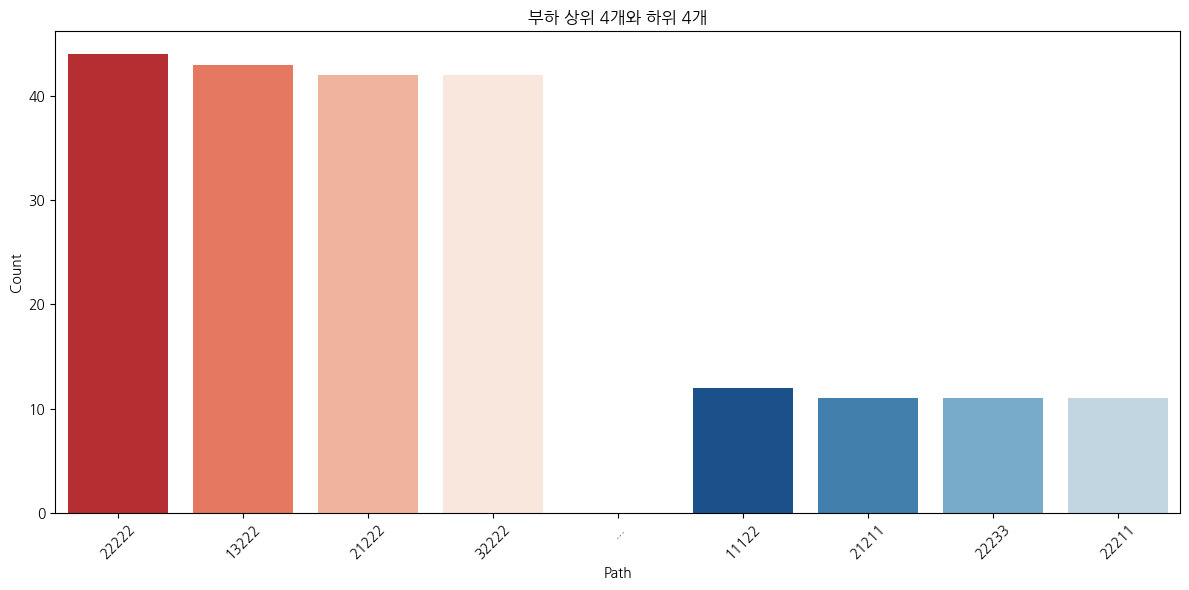

In [28]:
top_palette = ['#cb181d', '#fb6a4a', '#fcae91', '#fee5d9']
bottom_palette =['#08306b', '#08519c', '#3182bd', '#6baed6', '#bdd7e7']

plt.figure(figsize=(12, 6))

# 상위 4개의 카테고리와 하위 4개의 카테고리를 모두 포함한 그래프
top_4_paths = df['path'].value_counts().index[:4]
top_paths = df['path'].value_counts()
top_paths = top_paths[top_paths >= 10]
bottom_paths = ['11122', '21211', '22233', '22211']  # 원하는 순서로 변경한 하위 path
filtered_df = df[df['path'].isin(top_4_paths) | df['path'].isin(bottom_paths)]
ordered_paths = list(top_4_paths) + ['...'] + bottom_paths  # 내림차순으로 정렬된 카테고리 리스트에 ... 추가
sns.countplot(data=filtered_df, x='path', order=ordered_paths, palette=top_palette + bottom_palette)
plt.title('부하 상위 4개와 하위 4개')
plt.xlabel('Path')
plt.ylabel('Count')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.gca().set_xticks(range(len(ordered_paths)))  # x축 눈금 설정
plt.gca().set_xticklabels(ordered_paths)  # x축 눈금 라벨 설정

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()